## 標準化前的盒鬚圖
- 城市生活品質調查資料的盒鬚圖

C:\Users\Howard\AppData\Local\Temp\ipykernel_11840\35214687.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


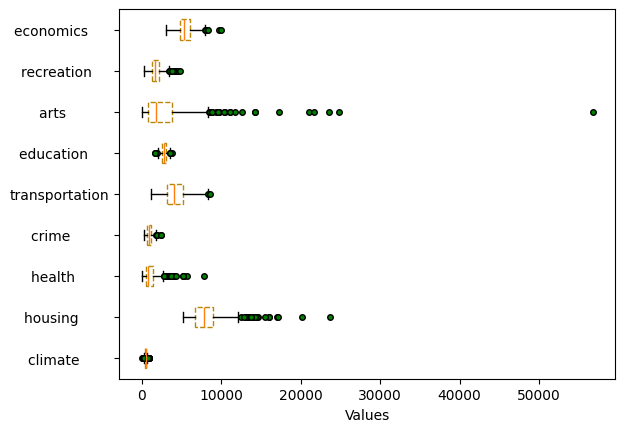

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel('city_quality.xlsx')
ratings = np.array(df)
categories = df.columns
fig, ax = plt.subplots()
boxprops = dict(linestyle = '--', linewidth = 1, \
color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green',
markersize = 4, linestyle = 'none')
ax.boxplot(ratings, boxprops = boxprops, \
flierprops = flierprops, \
labels = categories, vert = False)
ax.set_xlabel('Values')
plt.show()

- : 城市生活品質調查資料的盒鬚圖（標準化後）

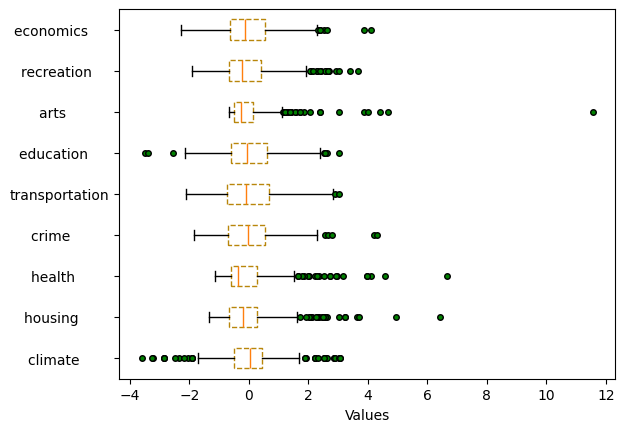

In [5]:
df = pd.read_excel('city_quality.xlsx')
ratings = np.array(df)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Compute the mean and std to be used for later scaling.
scaler.fit(ratings)
# Apply transform to dataset.
ratings_ = scaler.transform(ratings)
categories = df.columns
fig, ax = plt.subplots()
boxprops = dict(linestyle = '--', linewidth = 1, \
color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green',
markersize = 4, linestyle = 'none')
ax.boxplot(ratings_, boxprops = boxprops, \
flierprops = flierprops, \
labels = categories, vert = False)
ax.set_xlabel('Values')
plt.show()

## 範例 2. 
- 9 項評比（9 個變數）資料是否彼此相關？
- 彼此間的相關性有何差別？
- 畫一張相關矩陣圖（correlation matrix）是分析多變量資料的基本動作。


<Axes: >

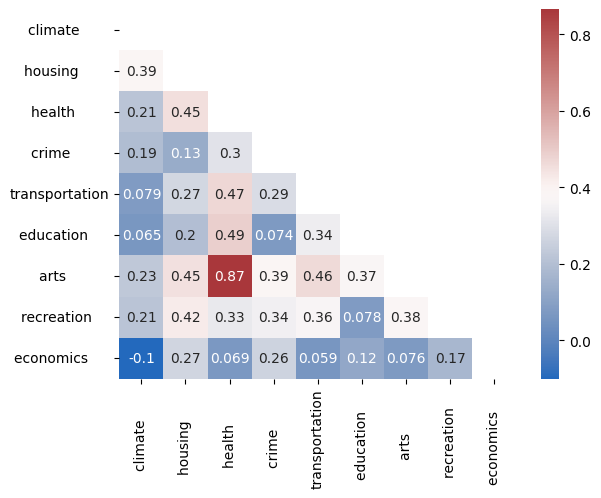

In [13]:
import seaborn
import pandas as pd
df = pd.DataFrame(ratings, columns = categories)
R = df.corr()
mask = np.triu(np.ones_like(R, dtype=bool)) # diagonal mask
seaborn.heatmap(R, annot=True, mask = mask, cmap='vlag')

- 由上圖可發現，「arts」與「health」的相關性最高

In [1]:
import numpy as np
# ratings_ is a 329 by 9 data matrix
Sx = np.cov(ratings_.T, bias=False)
N = ratings_.shape[0]
mu_x = ratings_.mean(axis = 0)
Tmp = ratings_ - mu_x
# Tmp = ratings_ − np.tile(mu_x, (N, 1))
# use numpy to compute the covariance matrix
Sx_formula = Tmp.T @ Tmp / (N - 1)


NameError: name 'ratings_' is not defined

### 做EIGENVALUE EIGENVECTOR

In [9]:
from numpy.linalg import eig
from numpy.linalg import inv
w, v = eig(Sx_formula)
idx = np.argsort(-w) #sort eigenvalues in descending order
# idx = np.argsort(w)[::−1]
eigvals = w[idx]
eigvecs = v[:, idx]
Sigma_x = eigvecs @ np.diag(eigvals) @ eigvecs.T


- 做PCA的圖
- 將解釋比例用紅線描繪出來

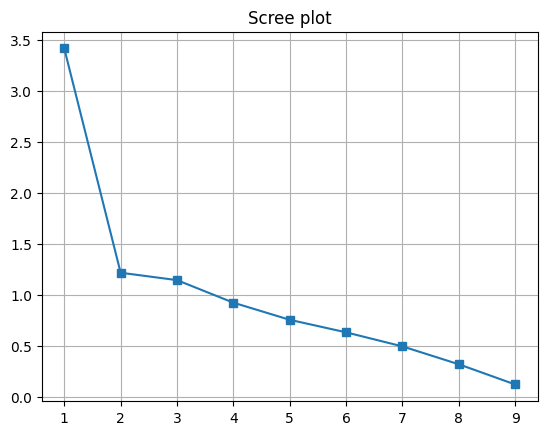

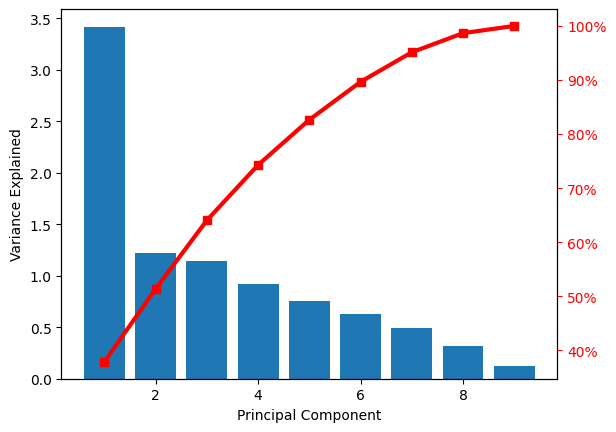

In [16]:
from matplotlib.ticker import PercentFormatter
plt.figure()
x = np.arange(1, 1+len(eigvals))
plt.plot(x, eigvals, marker='s')
plt.title('Scree plot')
plt.grid(True)
plt.show()
fig, ax = plt.subplots()
x = np.arange(1, 1+len(eigvals))
ax.bar(x, eigvals)
ax2 = ax.twinx()
ax2.plot(x, eigvals.cumsum()/eigvals.sum()*100, \
marker='s', color='red', lw=3)
ax2.tick_params(axis='y', colors='red')
ax2.yaxis.set_major_formatter(PercentFormatter())
ax.set_xlabel('Principal Component')
ax.set_ylabel('Variance Explained')
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([2, 1, 4, 5, 4])
X = np.c_[x1, x2] # 資料矩陣
# pca = PCA(n_components=1).fit(X) # 取 第 一 個 特 徵 向 量
pca = PCA().fit(ratings_) # 進 行 主 成 分 分 析
print(pca.explained_variance_ratio_) # 共 變 異 矩 陣 特 徵 值 佔 比
# print(pca.explained_variance_) # 共 變 異 矩 陣 的 特 徵 值
# print(pca.components_) # 共 變 異 矩 陣 的 特 徵 向 量
eigvals = pca.explained_variance_
print(eigvals)
eigvecs = pca.components_.T # by column [v1 v2]


NameError: name 'ratings_' is not defined

##範例四

In [18]:
import numpy as np
from scipy.stats import norm
from numpy.linalg import matrix_rank, eig
N = 100
x1 = norm.rvs(size=N)
x2 = norm.rvs(size=N)
x3 = norm.rvs(size=N)
x4 = x1 + x2
x5 = x2 + x3
x = np.c_[x1,x2,x3,x4,x5]
Sx = np.cov(X.T)
rank = matrix_rank(Sx)
w,v = eig(Sx)

## 主成分分析圖

[0.88490018 0.11509982]
[2.21225045 0.28774955]
[[-0.70710678 -0.70710678]
 [ 0.70710678 -0.70710678]]


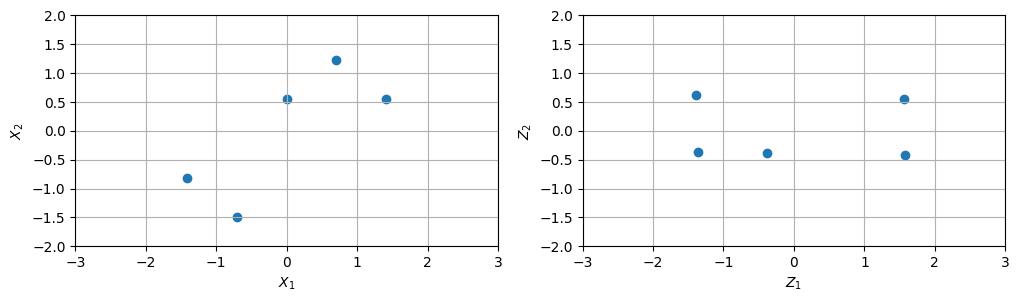

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x1 = np.array([1, 2, 3, 4, 5])
x2 = np.array([2, 1, 4, 5, 4])
X = np.c_[x1, x2] # 資料矩陣
# standardize the data(標準化)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# Do the PCA
pca = PCA().fit(X)
print(pca.explained_variance_ratio_) # ratio of eigenvalues(88%,12%)
print(pca.explained_variance_) # eigenvalues of sample covariance matrix
print(pca.components_)  # eigenvectors

# extract the eigenvalues and eigenvectors
eigvals = pca.explained_variance_
eigvecs = pca.components_.T # by column [v1 v2]

# compute the transformed values

Z = pca.transform(X) 

# Z = X @ eigvecs

# ------------------------------------------------
# 做圖
fig, ax = plt.subplots(1, 2, figsize = (12, 3))
ax[0].scatter(X[:,0], X[:,1])
ax[0].set_xlabel('$X_1$')
ax[0].set_ylabel('$X_2$')
ax[0].set_xlim([-3, 3])
ax[0].set_ylim([-2, 2])
ax[0].grid(True)
ax[1].scatter(Z[:,0], Z[:,1])
ax[1].set_xlabel('$Z_1$')
ax[1].set_ylabel('$Z_2$')
ax[1].set_xlim([-3, 3])
ax[1].set_ylim([-2, 2])
ax[1].grid(True)
plt.show()

作業說明